In [3]:
from classes import paper
import textproc
import os
import pandas as pd
import numpy as np
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

In [3]:
directory = '/home/jsd/paper_scraper/paper_yamls_plus_datasets/'
os.chdir(directory)
papers = []
for a in sorted(os.listdir(directory)):
    with open(a,'r') as infile:
        papers.append(load(infile,Loader=Loader))

In [161]:
def cols_to_multiindex(df,cols,toplevel=None,toplevelname=None):
    if toplevel:
        arr = [
            list(df[col]) for col in cols
        ]
        top = [toplevel]*len(arr[0])
        arr = [top,*arr]
        names = [toplevelname]+cols
    else:
        arr = [
            list(df[col]) for col in cols
        ]
        names = cols
    tuples = list(zip(*arr))
    index = pd.MultiIndex.from_tuples(tuples,names=names)
    df2 =  df.reindex(index)
    for i in range(len(df.index)):
        df2.iloc[i,:] = df.iloc[i,:]
    for j in cols:
        df2.drop(j,axis=1,inplace=True)
    return df2

# def make_strs_unique(strs_list,separator=None,tags='abcdefghijklmnopqrstuvwxyz'):
#     if not separator:
#         separator = ''
#     out = []
#     tag_len = 0
#     tag_dct = dict(zip(tags,range(len(tags))))
# #     return tag_dct
#     for string in strs_list:
#         last_out_match = None
#         if string not in out:
#             out.append(string)
#         else:
#             out_cp = out.copy()
#             out_cp.reverse()
#             for a in out_cp:
#                 if a.find(string) >-1:
#                     last_out_match = a
#                     break
#             if last_out_match == string:
#                 out.append(string+separator+tags[0])
#             else:
#                 current_tag = last_out_match.split(string)[-1]
# #                 if separator == '':
# #                     current_tag = last_out_match.split(string)[-1]
# #                 else:
# #                     current_tag = last_out_match.split(separator)[-1]
# #                 return current_tag[:-1]
# #                 tag_len = len(current_tag)
#                 tag_fixed_part = current_tag[:-1]
#                 tag_last_char = current_tag[-1]
#                 tag_last_ind = tag_dct[tag_last_char]
#                 next_tag_last_char = tags[(tag_last_ind+1)%len(tags)]
#                 out.append(string+tag_fixed_part+next_tag_last_char)
# #                 return next_tag_last_char
# #                 if tag_last_char != tags[-1]:
# #                     out.append(string+separator+current_tag[:-1]+tags[tag_last_ind+1])
# #                 else:
# #                     out.append(string+separator+current_tag[0:tag_len]+(tags[tag_len%len(tags)]*(tag_len+1))+tags[0])
# # #                     return string+separator+current_tag[0:tag_len]+tags[0]
# #                     tag_len+=1
# #                 return out
#     return out

In [2]:
# a = 'Chen 2017'
# b = [a]
# b[0]+= 'abc'[0]
# b

# 

In [3]:
# # for a in papers:
# #     a.phase_sep_df = cols_to_multiindex(a.phase_sep_df,['product name','method type'],toplevel=a.short_id,toplevelname='paper')

# ids = []
# alphabet = 'abcdefghijklmnopqrstuvwxyz'
# for a in papers:
#     a_id = a.short_id
#     for i in alphabet:
#         temp = a_id
#         if temp in ids:
#             temp += i
#         if temp not in ids:
#             a_id = temp
#             break
#     ids.append(a_id)
#     df = a.phase_sep_df
#     arr = [a_id]*len(df)
#     a.phase_sep_df = a.phase_sep_df.set_index(arr)

In [12]:
current_paper = papers[29]
current_paper.phase_sep_df.to_csv('~/Desktop/'+current_paper.short_id+'.csv')

In [21]:
newdf = pd.concat([a.phase_sep_df for a in papers])

In [4]:
import re
def standardize_vals(df,collapse_diffs=['case','typos','subsets']):
    for col in df.columns:
        std_vals = []
        lst = [val for val in df[col]]
        for string in lst:
            if not isinstance(string,str):
                continue
            if string not in std_vals:
                std_vals.append(string)
            else:
                continue
            
            
            if 'case' in collapse_diffs:
                string = string.lower()
                newlst = []
                for a in lst:
                    if isinstance(a,str):
                        newlst.append(a.lower())
                    else:
                        newlst.append(a)
                lst = newlst
            if 'subsets' in collapse_diffs:
                string = re.split(r':|\(',string)[0].strip()
                newlst = []
                for a in lst:
                    if isinstance(a,str):
                        newlst.append(re.split(r':|\(',a)[0].strip())
                    else:
                        newlst.append(a)
                lst = newlst
#             if 'typos' in collapse_diffs:

            matches = [0]*len(lst)
            for i in range(len(lst)):
                if lst[i] == string:
                    matches[i] = 1
            for j in range(len(lst)):
                if matches[j] == 1:
                    lst[j] = string
        df.loc[:,col] = lst
            
    return df

In [94]:
from matplotlib import pyplot as plt
df = pd.read_csv('test.csv',header=[0])
df.columns.drop(df.filter(regex='.\.\d|Unnamed'))
df2 = df.loc[1:,df.columns.drop(df.filter(regex='IDs|.\.\d|Unnamed'))]
df2
df2= df2.replace(to_replace=r'^NR.*',value=np.nan,regex=True)
df2
df2.loc[:,df2.columns.drop(df2.filter(regex=r'(?i)ids|method|product|host|context|recipe|stage|model|phase'))] = df2.loc[:,df2.columns.drop(df2.filter(regex='(?i)ids|method|product|host|context|recipe|stage|model|phase'))].astype(float)
cols = list(df2.columns[0:10])+list(df2.columns[-4:-1])
cols.remove('Method description')
cols.remove('Recipe')
df2.loc[:,cols] = standardize_vals(df2.loc[:,cols],collapse_diffs=['subsets','case'])
# df2.loc[:,'Optimization method'] = df2.loc[:,'Optimization method'].replace({'ofat':1,'doe':2,-1:0})
df2.loc[:,'Theoretical model'] = df2.loc[:,'Theoretical model'].replace({'yes':1,np.nan:0})
df2.loc[df2['Host type']=='micobre','Host type'] = 'microbe'

HCP lrv    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

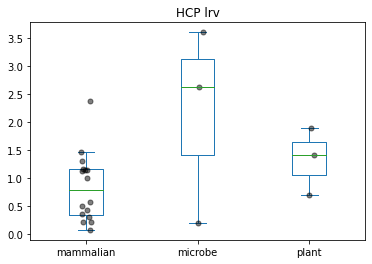

In [156]:
def __box_scatter(df,by,val):
    lst = []
    for i in range(len(val)):
        try:
            firstval = df.loc[:,by[i]].iloc[0]
        except KeyError:
            firstval = df.loc[:,by[i]].iloc[0][0]
        if isinstance(firstval,str):
            lst.append("(df_cp['{}']=='{}')".format(by[i],val[i]))
        else:
            lst.append("(df_cp['{}']=={})".format(by[i],val[i]))
    string = '&'.join(lst)
    return string

def box_scatter(df:pd.DataFrame,column:str,by:list,dropnas=True,jitter=0,marker='o',mec='k',mfc='k',ls='',alpha=0.5,markersize=5,**kwargs):
    if dropnas:
        df_cp = df.dropna(how='all',axis=0,subset=column)
        df_cp = df_cp.dropna(how='any',axis=0,subset=by)
    else:
        df_cp = df
    if not isinstance(by,list):
        by = [by]
    plot = df_cp.plot(kind='box',column=column,by=by,showfliers=False)
    vals = sorted(textproc.unique(df_cp.loc[:,by].values))
    for i in range(len(vals)):
        val = vals[i]
        y = df_cp.loc[eval(__box_scatter(df_cp,by,val)),column]
        x = [i+1]*len(y)
        x = np.random.uniform(low=-jitter,high=jitter,size=len(y))+np.array([i+1]*len(y))
        plt.plot(x,y,marker=marker,mec=mec,mfc=mfc,markersize=markersize,ls=ls,alpha=alpha,**kwargs)
    return plot

# df2 = df2.fillna({'Optimization method':'None'})
# sum([np.isnan(a) for a in df2['Optimization method'].values if not isinstance(a,str)])
# df2['Optimization method'].values
# type(df2.loc[:,'Optimization method'].iloc[0])
box_scatter(df2,'HCP lrv',['Host type'],dropnas=True,jitter=0.05)

<AxesSubplot:xlabel='Yield (%)', ylabel='HCP lrv'>

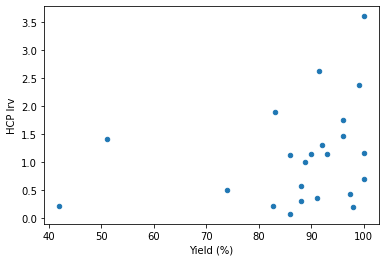

In [88]:
df2.plot(kind='scatter',x='Yield (%)',y='HCP lrv')